![](https://mcd.unison.mx/wp-content/themes/awaken/img/logo_mcd.png)

# Ejemplo de Regresión lineal

## Aprendizaje Automático Aplicado

## Maestría en Ciencia de Datos

**Ivo Jiménez** y **Julio Waissman**, 2022

[Abrir en google Colab](https://colab.research.google.com/github/mcd-unison/aaa-curso/blob/main/ejemplos/reg_lineal.ipynb)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16,8)
plt.style.use('ggplot')

## 1. Un ejemplo en una sola dimensión

Vamos a abrir y a visualizar unos datos que se encuentran en el archivo `carretas.txt` (abrelos con un editor de texto si quieres ver el archivo original). En este archivo se tiene las ganancias anuales (en dolares) de unos tacos de carreta (bueno, su equivalente gringo) respecto al tamaño de la ciudad donde se encuentra la carreta. Estos datos provienen de el curso de *Machine learning* de *coursera* de *Andrew Ng*.



In [2]:
# Lee los datos en un nd array llamado datos

url = 'https://github.com/mcd-unison/aaa-curso/raw/main/ejemplos/carretas.txt'
datos = np.loadtxt(url, comments='%', delimiter=',')


In [3]:
datos

array([[ 6.1101 , 17.592  ],
       [ 5.5277 ,  9.1302 ],
       [ 8.5186 , 13.662  ],
       [ 7.0032 , 11.854  ],
       [ 5.8598 ,  6.8233 ],
       [ 8.3829 , 11.886  ],
       [ 7.4764 ,  4.3483 ],
       [ 8.5781 , 12.     ],
       [ 6.4862 ,  6.5987 ],
       [ 5.0546 ,  3.8166 ],
       [ 5.7107 ,  3.2522 ],
       [14.164  , 15.505  ],
       [ 5.734  ,  3.1551 ],
       [ 8.4084 ,  7.2258 ],
       [ 5.6407 ,  0.71618],
       [ 5.3794 ,  3.5129 ],
       [ 6.3654 ,  5.3048 ],
       [ 5.1301 ,  0.56077],
       [ 6.4296 ,  3.6518 ],
       [ 7.0708 ,  5.3893 ],
       [ 6.1891 ,  3.1386 ],
       [20.27   , 21.767  ],
       [ 5.4901 ,  4.263  ],
       [ 6.3261 ,  5.1875 ],
       [ 5.5649 ,  3.0825 ],
       [18.945  , 22.638  ],
       [12.828  , 13.501  ],
       [10.957  ,  7.0467 ],
       [13.176  , 14.692  ],
       [22.203  , 24.147  ],
       [ 5.2524 , -1.22   ],
       [ 6.5894 ,  5.9966 ],
       [ 9.2482 , 12.134  ],
       [ 5.8918 ,  1.8495 ],
       [ 8.211

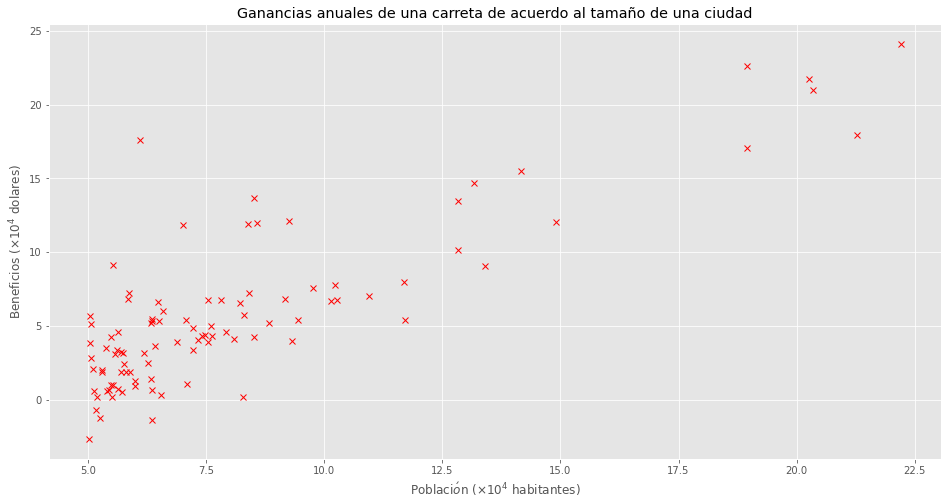

In [4]:

# Separa los datos de entrada de los de salida.
# si decimos que x = datos[:,0], pues se toma solo una columna de datos,
# por lo que x sería un ndarray de forma (shape) (96,). Al decir x = datos[:, 0:1]
# significa que vamos a tomar todas las columnas de 0 a una antes de 1, por lo
# que x tiene una forma (96, 1). Para mantener generalidad, es mejor manejar x como una matriz
# de una sola columna que como un vector de una dimensión.
x, y = datos[:,0:1], datos[:,1]

# T es el número de instancias y n el de atributos
T, n = x.shape

plt.plot(x, y, 'rx')
plt.title(u'Ganancias anuales de una carreta de acuerdo al tamaño de una ciudad')
plt.xlabel(r"Poblaci$\'o$n ($\times 10^4$ habitantes)")
plt.ylabel(r'Beneficios ($\times 10^4$ dolares)')
plt.show()

Listo, ya temos los datos. La hipótesis que hacemos es que el valor de salida lo podemos estimar como

$$
\hat{y}^{(i)} = h_{\theta}(x^{(i)}) = \omega_1 x^{(i)} + b, \quad \theta = (b, \omega_1)
$$


El criterio MSE como función de pérdida es el de minimizar el costo definido como
$$
E_{in}(\omega, b) = \frac{1}{2M} \sum_{i = 1}^M (y^{(i)} - \hat{y}^{(i)})^2.
$$

Por lo tanto, para saber si estamos minimizando o no, debemos ser capaces de medir la función de pérdida.

**Desarrolla la función de costo tal como se pide abajo**

In [5]:
x.shape

(97, 1)

In [6]:
x[1]

array([5.5277])

In [7]:
def mse(x, y, w, b):
    """
    Calcula el costo de acuerdo al criterio de MSE (mean square error) asumiendo un conjunto de datos
    x, con una salida y, y una hipótesis lineal parametrizada por omega

    Parámetros
    ----------
    x: Un ndarray de dimension (M, n)
    y: Un ndarray de dimensión (M, )
    w: Un ndarray de dimensión (n, )
    b: Un flotante

    Devuelve
    --------
    Un flotante con el costo

    """
    M, n = x.shape
    z = 0
    for m in range(M):
        y_prima = w @ x[m] + b
        z += np.power(y[m] - y_prima, 2)
    
    loss = z / (2*M)

    return loss


y para probar si está bien el programa, si calculamos $E_in(\omega, b)$ para $\omega_1 = 0$, $b = 1$ debe de dar (para este conjunto de datos) **26.73** (recuerda verificar que regrese un flotante y no un vector de un solo elemento).

In [8]:
w = np.zeros([n])
b = 1
print("El error en muestra es {}".format(mse(x, y, w, b)))

El error en muestra es 26.733598825909258


Muy bien, ya podemos calcular el criterio a optimizar. Vamos entonces a utilizar la función que acabamos de hacer para ver sus valores para diferentes valores de $\omega$ y $b$.

c:\Users\Ivan\.conda\envs\f80-2\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


Text(0.5, 1.0, 'Funcion de perdida')

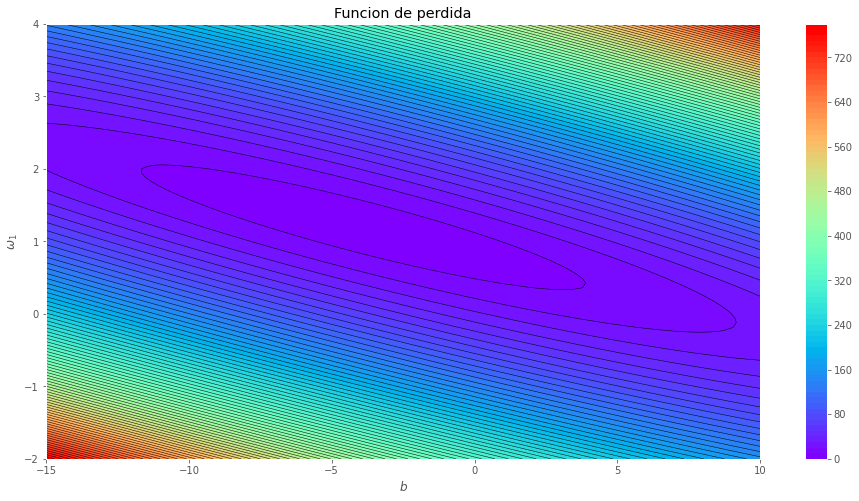

In [9]:
# Definimos una función de burrito (wrap) que depende solo de b y theta1
def costo_w(b, w1):
    return mse(x, y, np.array([w1]), b)

# Y ahora la convertimos en una función tipo numpy (aplica para cualquier entrada de ndarrays)
costo_vect = np.frompyfunc(costo_w, 2, 1)

#Ahora generamos la lista de valores para graficar
b = np.linspace(-15, 10, 100);
w1 = np.linspace(-2, 4, 100);

# Y los convertimos en matrices utilizando la función meshgrid
b, w1 = np.meshgrid(b, w1)

# Y calculamos los costos para cada par de theta0 y theta 1 con nuestra nueva funcion de costos vectorizada
J = costo_vect(b, w1)

# Y graficamos el contorno
plt.contour(b, w1, J, 80, linewidths=0.5, colors='k')
plt.contourf(b, w1, J, 80, cmap=plt.cm.rainbow, vmax=J.max(), vmin=J.min())
plt.colorbar()
plt.xlabel(r"$b$")
plt.ylabel(r"$\omega_1$")
plt.title(r"Funcion de perdida")


Ahora si, ya tenemos todo para hacer nuestra función para encontrar los parámetros que optimicen la función de costo (que como se puede ver en la superficie debería de estar por donde $b$ vale entre 0 y -5 y $\omega_1$ entre 1 y 2).

**Desarrolla la función con descenso de gradiente.**

In [10]:
w = np.array([0])
b = 0
alpha = 0.001
hist =[]
# for i in range(100):
y_prima = (w.T * x + b)
error = y - y_prima
w = w - 1/x.shape[0]*x.T @ error
b = b - 1/x.shape[0]*-np.full(x.shape[0], 1).T @ error
# hist.append(w)
# hist

In [11]:
w

array([[-143.5472016 ,  -74.50060596, -111.4791876 ,  -96.7262692 ,
         -55.67676334,  -96.9873828 ,  -35.48125834,  -97.9176    ,
         -53.84407226,  -31.14269268,  -26.53730156, -126.517699  ,
         -25.74498498,  -58.96108284,   -5.84388556,  -28.66456142,
         -43.28610704,   -4.57577105,  -29.79795764,  -43.97561014,
         -25.61034828, -177.6143666 ,  -34.7852274 ,  -42.3289625 ,
         -25.1525835 , -184.7215524 , -110.1654598 ,  -57.49966266,
        -119.8837816 , -197.0346906 ,    9.954956  ,  -48.93105668,
         -99.0110132 ,  -15.0915501 ,  -53.38630748,  -37.22745554,
         -33.58900072,  -27.68456944,  -82.5526966 ,  -44.85768452,
          -4.54149989,  -31.9170577 ,  -43.94378692,  -19.91480788,
         -54.93014164,   -8.53759874,  -41.88996526,  -15.0466712 ,
         -65.31348714,   -8.30586042,  -55.08191392,  -15.01076808,
         -34.9933023 ,  -40.78349638,  -11.61384334,   11.59589178,
         -20.20040088,  -37.56935116,  -32.33239

In [12]:
b

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

In [16]:
def grad_costo(x, y, w, b):
    """
    Calcula el gradiente respecto a w y b de los datos existentes

    Parámetros
    ----------
    x: ndarray de dimension [M, n] con la matriz de diseño
    y: ndarray de dimension [M,] con los valores de salida
    w: ndarray de dimension [n, ] con los pesos
    b: flotante con el sesgo

    Devuelve
    --------
    dw, db: donde dw es un vector de dimension de w con el gradiente
            de la función de costo respecto a w, y db es la derivada de la
            funcion de costo respecto a b

    """
    error = y - (x @ w + b)

    # --aqui hay que poner código--
    dw = 1/x.shape[0]*-x.T @ error
    db = 1/x.shape[0]*-np.full(x.shape[0], 1).T @ error
    #------------------------------

    return dw, db

In [17]:
def descenso_gradiente_lotes(x, y, w_0, b_0, nu, max_epoch):
    """
    Descenso de gradiente durante num_iter iteraciones para regresión lineal

    Parámetros
    -----------
    x: ndarray de dimension [M, n] con los datos de entrada
    y: ndarray de dimension [M,] con los datos de salida
    w_0: ndarray de dimension [n, ] con los pesos iniciales
    b_0: flotante con el sesgo inicial
    nu: flotante con tamaño de paso o tasa de aprendizaje.
    max_epoch: numero de iteraciones (entero)

    Devuelve
    --------
    w, b, mse_iter: donde w y b tiene las dimensiones de w_0 y b_0 con los parámetros
                    aprendidos, mientras que mse_hist es un ndarray de dimensión
                    [num_iter, 1] con el costo en cada iteración.

    """
    w, b = w_0.copy(), b_0
    mse_iter = np.zeros(max_epoch)
    M, n = x.shape

    for iter in range(max_epoch):

        dw, db = grad_costo(x, y, w, b)

        # --aqui hay que poner código--
        w -= nu*dw
        b -= nu*db
        #------------------------------

        mse_iter[iter] = mse(x, y, w, b)

    return w, b, mse_iter


Y para saber si el algoritmo se programo bien, se puede probar en el problema del *food truck* y revisar si el valor de la función de pérdida se va reduciendo hasta estabilizarse en un mínimo.

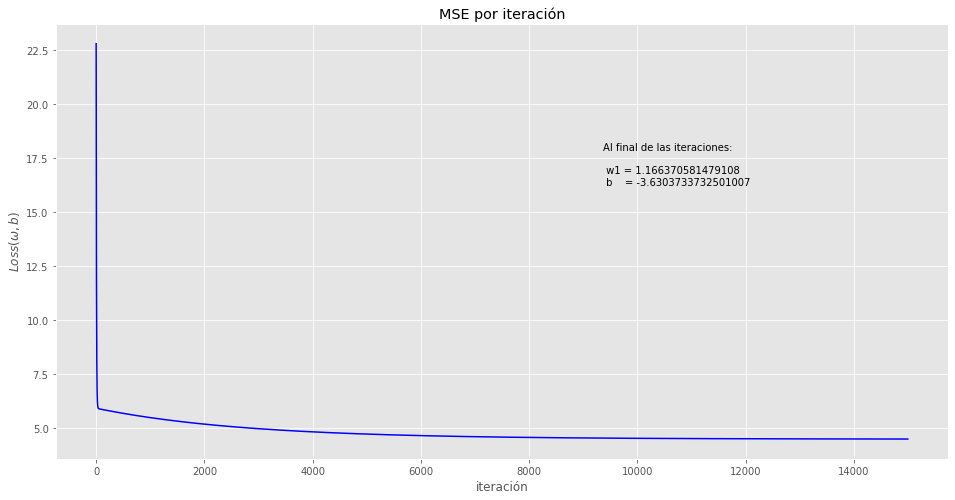

In [18]:
w_0 = np.array([0.1])
b_0 = 0.0

iteraciones = 15000
alpha = 0.001

w, b, mse_historial = descenso_gradiente_lotes(x, y, w_0, b_0, alpha, iteraciones)


plt.plot(mse_historial, 'b')
plt.title(u'MSE por iteración')
plt.xlabel(u'iteración')
plt.ylabel(r'$Loss(\omega, b)$')
plt.figtext(x=.6, y=.6, s="Al final de las iteraciones:\n\n w1 = {}\n b    = {}".format(w[0], b))
plt.show()

Ahora vamos a revisar virtualmente si la estimación es una linea recta que pasa entre todos los puntos.

**Completa los pasos para realizar la estimación.**

In [19]:
w , b

(array([1.16637058]), -3.6303733732501007)

In [20]:
x_estimar = np.array([[4],[24]])

#
# Agrega el codigo necesario
#
y_estimado = x_estimar @ w + b

print("Los valores estimados son: {}".format(y_estimado))

Los valores estimados son: [ 1.03510895 24.36252058]


Si los valores que obtuviste son cercanos a 1 (10000 dolares) y 24.3 (243000 dolares) entonces estamos en los valores esperados. Ahora vamos a usar estos valores para graficar los datos reales y la estimación realizada:

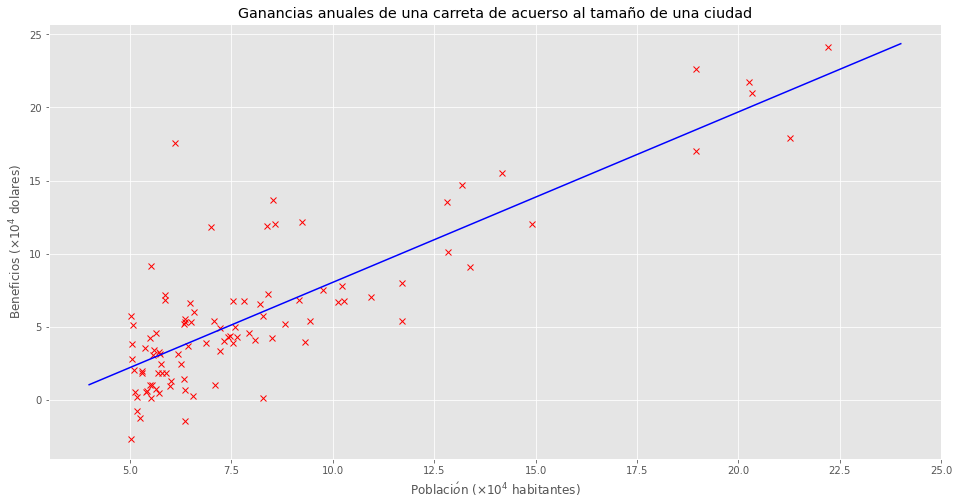

In [21]:
plt.plot(x[:], y, 'xr')
plt.plot(x_estimar[:,0], y_estimado, '-b')
plt.title(u'Ganancias anuales de una carreta de acuerso al tamaño de una ciudad')
plt.xlabel(r"Poblaci$\'o$n ($\times 10^4$ habitantes)")
plt.ylabel(r'Beneficios ($\times 10^4$ dolares)')
plt.show()

**¡Felicidades!** Acabas de terminar el algoritmo de aprendizaje más usado en el mundo.

# 2. Un ejemplo en multiples dimensiones

Como el algortimo realizado ya funciona para muchas dimensiones, no se espera tener mucho problema para utilizarlos. Así que ahora vamos a cargar datos y vamos a graficar la salida respecto a dos variables

Text(0.5, 0, 'cuartos')

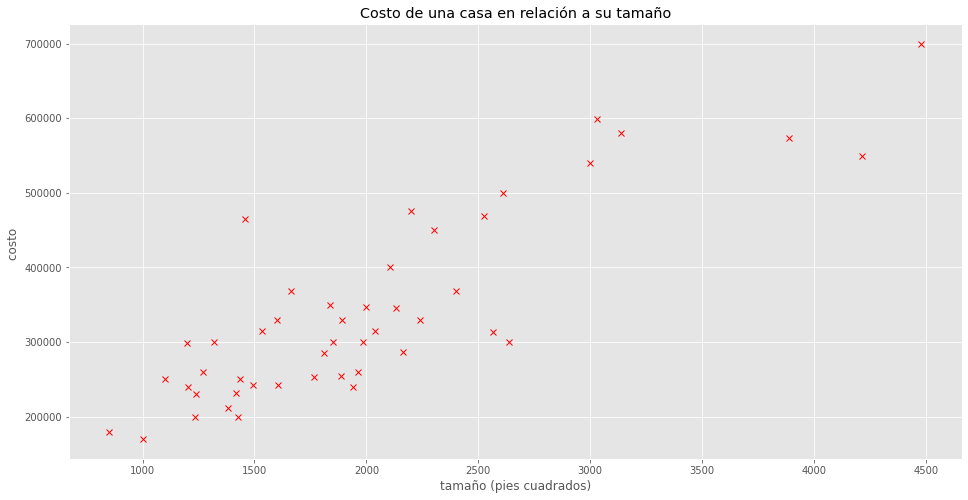

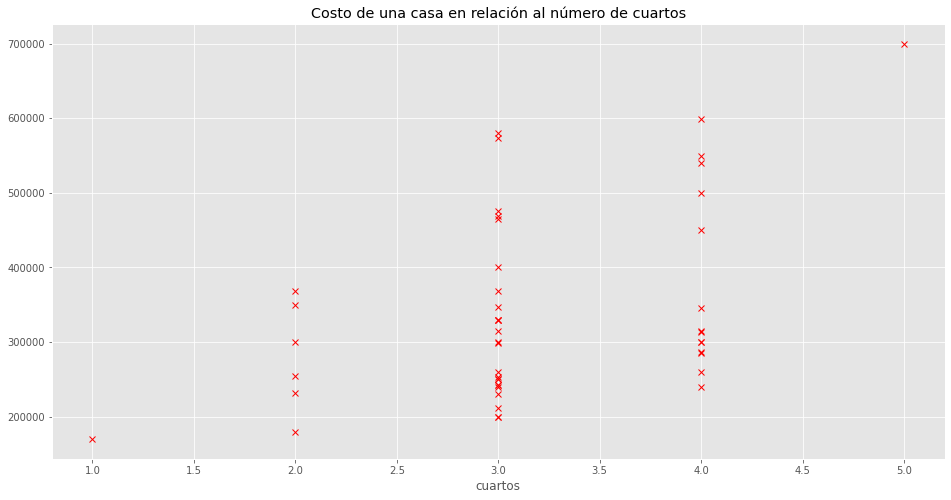

In [22]:
url = "https://github.com/mcd-unison/aaa-curso/raw/main/ejemplos/casas_portland.txt"
datos = np.loadtxt(url, comments='%', delimiter=',')
x, y = datos[:, :-1], datos[:,-1]

# M es el número de instancias y n el de atributos
M, n = x.shape

plt.plot(x[:,0], y, 'rx')
plt.title(u'Costo de una casa en relación a su tamaño')
plt.xlabel(u"tamaño (pies cuadrados)")
plt.ylabel('costo ')

plt.figure()
plt.plot(x[:,1], y, 'rx')
plt.title(u'Costo de una casa en relación al número de cuartos')
plt.xlabel("cuartos")



Antes de realizar el aprendizaje podemos ver que mientras una de las variables se mide en miles de pies cuadrados, la otra variable tiene valores de 1 a 4. Esto es un problema para el algoritmo del descenso de gradiente, por lo que es necesario normalizar los datos (solo para este algoritmo) y que funcione de manera correcta.

Para normalizar requerimos de dos pasos, por un lado, obtener los valores de medias y desviaciones estandares por atributo, y en segundo lugar, realizar la normalización. Los valores de medias y desviaciones estandares hay que guardarlos, ya que serán necesarios para poder normalizar los datos que se quiera estimar.

**Estas funciones ya las hicimos realizadas pero revisalas por favor.**

In [23]:
def obtiene_medias_desviaciones(x):
    """
    Obtiene las medias y las desviaciones estandar atributo a atributo.

    Parámetros
    ----------
    x: un ndarray de dimensión (T, n) donde T es el númro de elementos y
       n el número de atributos

    Devuelve
    ---------
    medias, desviaciones: donde ambos son ndarrays de dimensiones (n,) con
                          las medias y las desviaciones estandar respectivamente.

    """
    medias = x.mean(axis = 0)
    desviaciones = x.std(axis = 0)
    return medias, desviaciones


def normaliza(x, medias, desviaciones):
    """
    Normaliza los datos x

    Parámetros
    ----------
    x: un ndarray de dimensión (T, n) donde T es el númro de elementos y n el número de atributos
    medias: ndarray de dimensiones (n,) con las medias con las que se normalizará
    desviaciones: ndarray de dimensiones (n,) con las desviaciones con las que se normalizará

    Devuelve
    --------
    x_norm, un ndarray de las mismas dimensiones de x pero normalizado

    """
    return (x - medias) / desviaciones


# Y ahora vamos a hacer algo muy simple para probar, que pueden corroborar con el uso de una calculadora común.
x_prueba = np.array([[1, 300],
                    [3, 100],
                    [2, 400],
                    [4, 200]])
m, d = obtiene_medias_desviaciones(x_prueba)

print("Los datos son: \n{}".format(x_prueba))
print("Las medias son: \n{}".format(m))
print("Las desviaciones son: \n{}".format(d))
print("Los datos normalizados son: \n{}".format(normaliza(x_prueba, m, d)))


Los datos son: 
[[  1 300]
 [  3 100]
 [  2 400]
 [  4 200]]
Las medias son: 
[  2.5 250. ]
Las desviaciones son: 
[  1.11803399 111.80339887]
Los datos normalizados son: 
[[-1.34164079  0.4472136 ]
 [ 0.4472136  -1.34164079]
 [-0.4472136   1.34164079]
 [ 1.34164079 -0.4472136 ]]


Listo, entonces ya podemos hacer descenso de gradiente, o casi. El problema es que no sabemos cual sería el mejor valor para $\alpha$. Escoge el valor de $\alpha$ realizando una gráfica de 50 iteraciones solamente para valores desde 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, ... y decide cual de los valores es el que más te conviene.

**Selecciona un valor, especifica aquí cual es, y justifica porque lo seleccionaste.**

In [24]:
medias, desviaciones = obtiene_medias_desviaciones(x)
x_norm = normaliza(x, medias, desviaciones)

Text(0, 0.5, 'MSE')

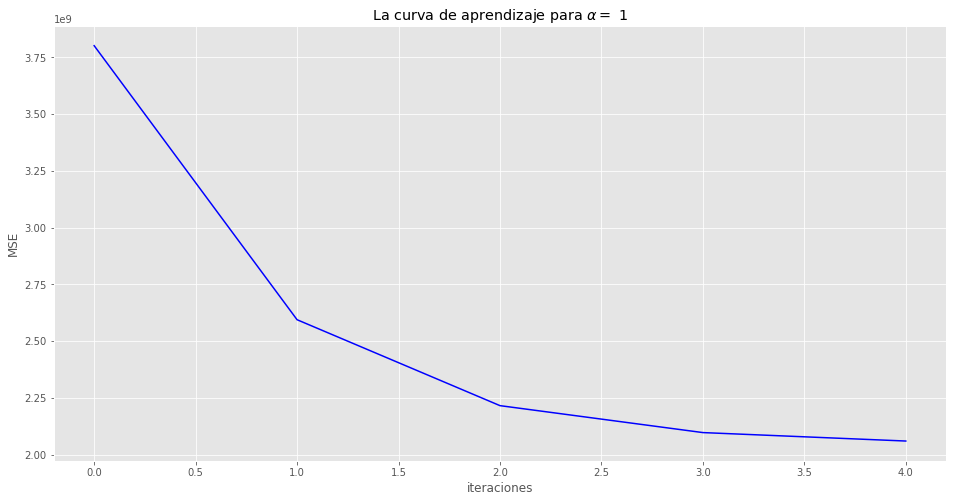

In [25]:
w_ini = np.zeros((n,))
b_ini = 0
num_iters = 5

#lpha = 0.0001  # Aqui es donde hay que hacer las pruebas
alpha = 1

_, _, mse_hist = descenso_gradiente_lotes(x_norm, y, w_ini, b_ini, alpha, num_iters)

plt.plot(mse_hist, '-b')
plt.title(r"La curva de aprendizaje para $\alpha =$ " + str(alpha))
plt.xlabel('iteraciones')
plt.ylabel('MSE')

In [26]:
mse_iter = np.zeros(5)
mse_iter

array([0., 0., 0., 0., 0.])

**Utilizando las iteraciones necesarias, encuentra el valor de $\omega$ y $b$ utilizando el descenso de gradiente.**

Text(0.6, 0.6, 'w =109370.05670466014\n b =340412.563014392')

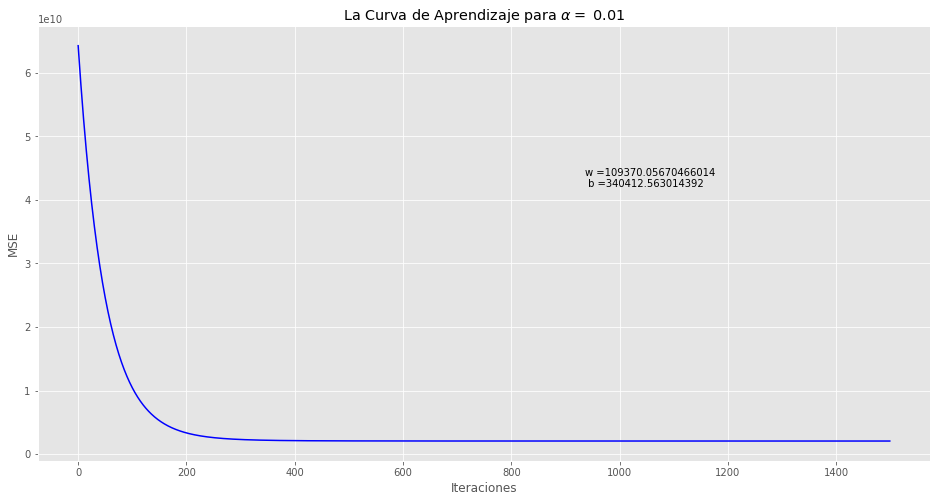

In [27]:
num_iters = 1500

alpha = 0.01

w, b, mse_hist = descenso_gradiente_lotes(x_norm, y, w_ini, b_ini, alpha, num_iters)

plt.title(r"La Curva de Aprendizaje para $\alpha =$ " + str(alpha))
plt.plot(mse_hist, '-b')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')
plt.figtext(x = 0.6, y = 0.6, s = "w ={}\n b ={}".format(w[0], b))

In [28]:
casa_ft = np.arange(1000, 4500, 100)
num_crts = np.full(casa_ft.shape, 3)

x_estimate = np.vstack((casa_ft, num_crts)).T

In [29]:
x_norm = normaliza(x_estimate, medias, desviaciones)
#
# Agrega el codigo necesario
#
y_estimado = x_norm @ w + b

print("Los valores estimados son: {}".format(y_estimado))

Los valores estimados son: [202675.80060568 216586.98000108 230498.15939648 244409.33879187
 258320.51818727 272231.69758267 286142.87697807 300054.05637346
 313965.23576886 327876.41516426 341787.59455966 355698.77395505
 369609.95335045 383521.13274585 397432.31214125 411343.49153665
 425254.67093204 439165.85032744 453077.02972284 466988.20911824
 480899.38851363 494810.56790903 508721.74730443 522632.92669983
 536544.10609523 550455.28549062 564366.46488602 578277.64428142
 592188.82367682 606100.00307221 620011.18246761 633922.36186301
 647833.54125841 661744.72065381 675655.9000492 ]


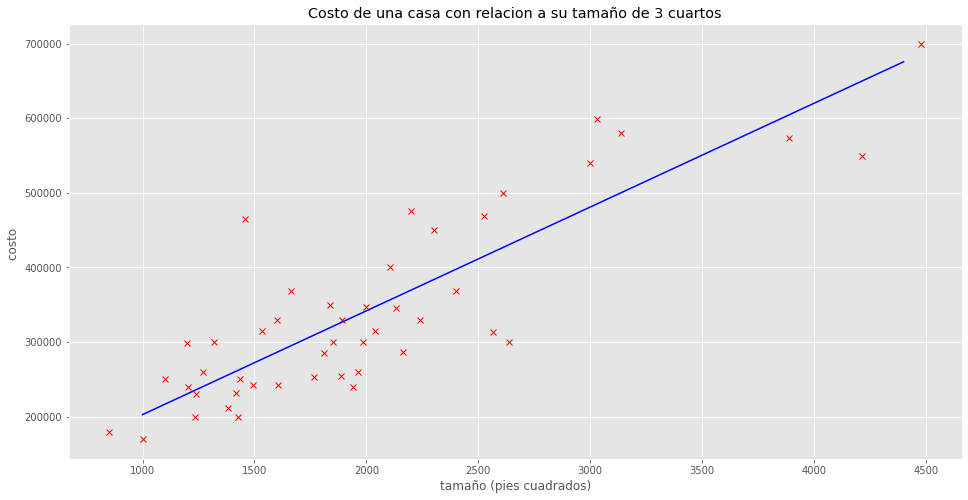

In [30]:
plt.plot(x[:,0], y, 'rx')
plt.plot(x_estimate[:,0], y_estimado, '-b')
plt.title(u'Costo de una casa con relacion a su tamaño de 3 cuartos')
plt.xlabel(u"tamaño (pies cuadrados)")
plt.ylabel('costo ')
plt.show()

**Obten el valor de una casa de 1650 pies cuadrados y 3 recamaras con el modelo obtenido (recuerda que hay que normalizar).**

In [31]:
# Escribe aquí el código
single_x = [1600, 3]
x_norm = normaliza(single_x, medias, desviaciones)

y_est = w @ x_norm + b

print("Precio Estimado: ", y_est)


Precio Estimado:  286142.8769780662
